# Efficient-CapsNet Model Train

In this notebook we provide a simple interface to train Efficient-CapsNet on the three dataset discussed in "Efficient-CapsNet: Capsule Network with Self-Attention Routing":

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

The hyperparameters have been only slightly investigated. So, there's a lot of room for improvements. Good luck!

**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages, plotHistory
from models import EfficientCapsNet

In [7]:
# some parameters
model_name = 'MNIST'

# 1.0 Import the Dataset

In [8]:
dataset = Dataset(model_name, config_path='config.json')

type of files:  <class 'list'>
type of files:  <class 'list'>
(287, 256, 256)
[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

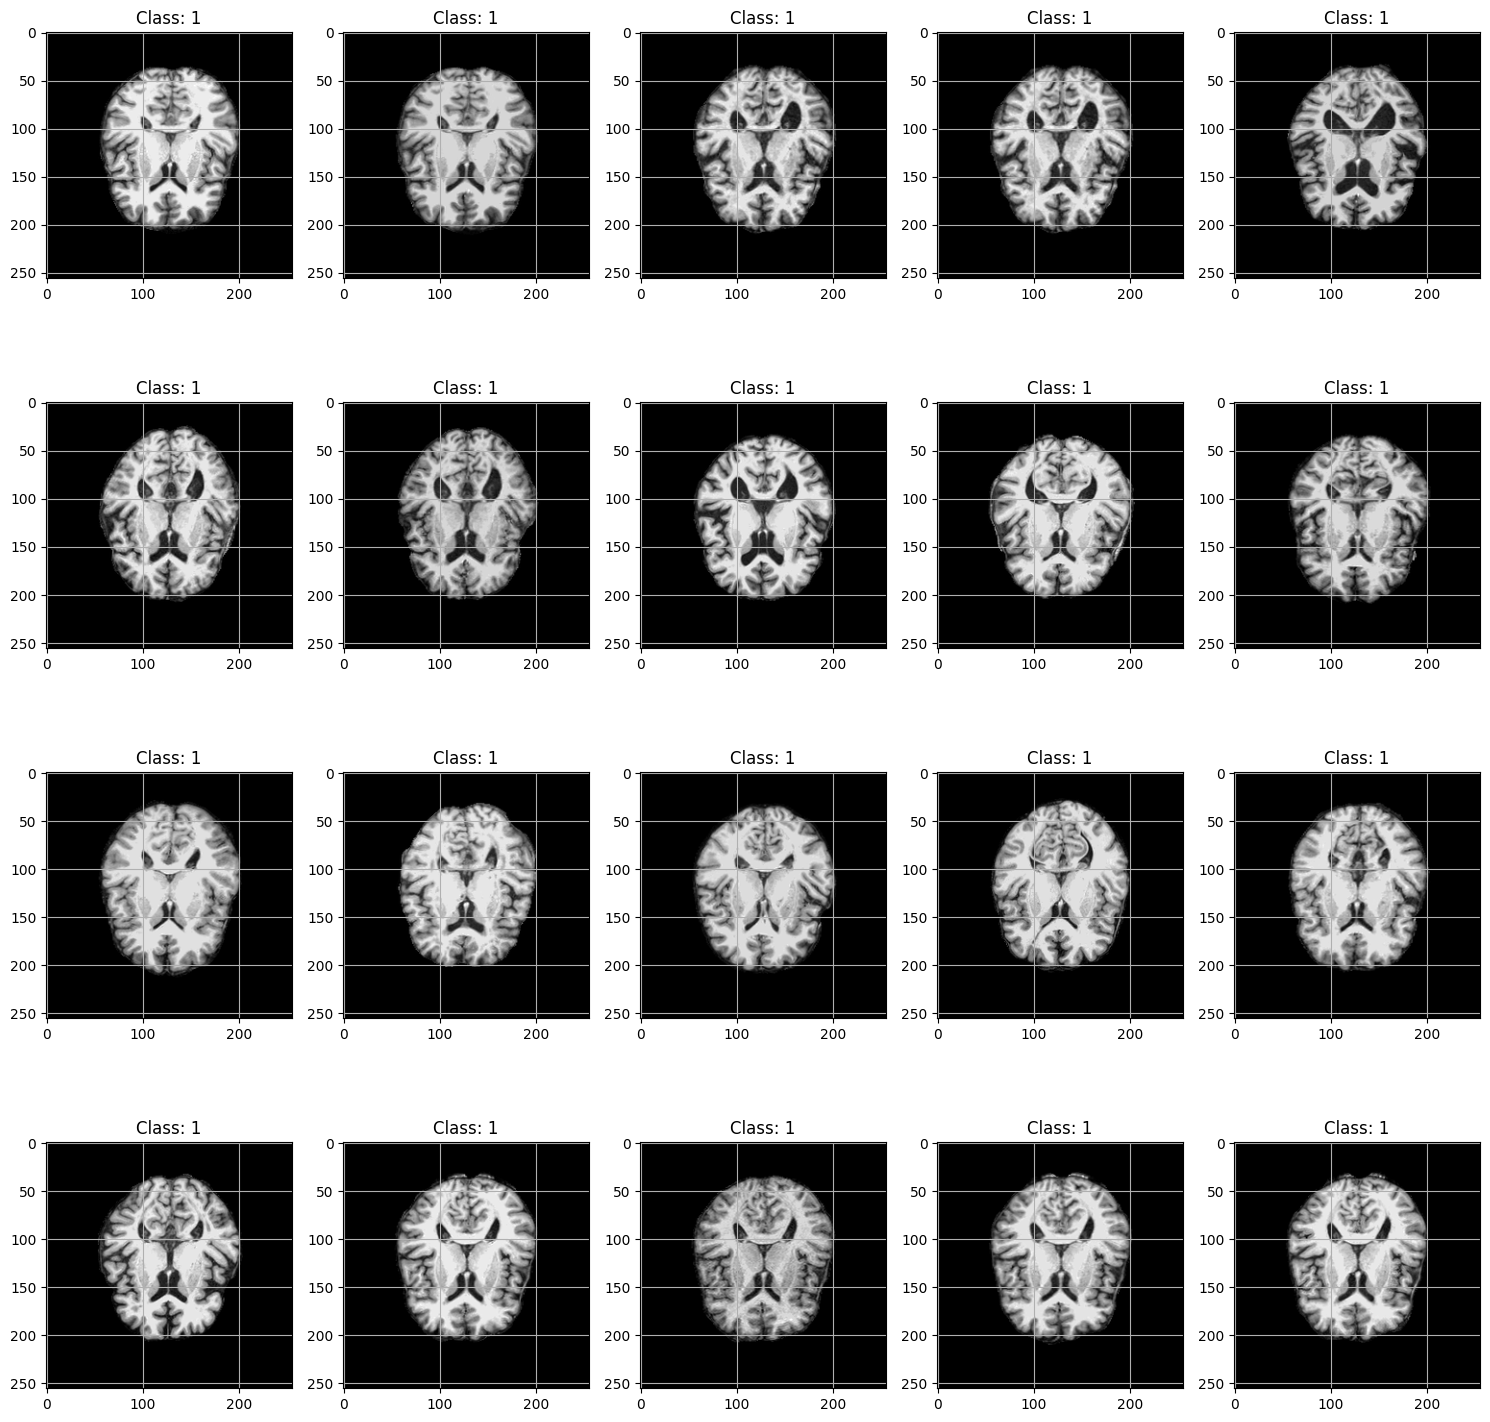

In [9]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [10]:
model_train = EfficientCapsNet(model_name, mode='train', verbose=True)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 127, 127, 128)     1280      
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 128)    512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 63, 63, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 128) 

# 3.0 Train the Model

In [11]:
dataset_train, dataset_val = dataset.get_tf_data() 

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [13]:
history = model_train.train(dataset, initial_epoch=0)

Epoch 2/3
18/18 [==============================] - ETA: 0s - loss: 0.3649 - Efficient_CapsNet_loss: 0.2710 - Generator_loss: 0.2395 - Efficient_CapsNet_accuracy: 1.0000
Epoch 2: val_Efficient_CapsNet_accuracy did not improve from 0.76000
18/18 [==============================] - 27s 2s/step - loss: 0.3649 - Efficient_CapsNet_loss: 0.2710 - Generator_loss: 0.2395 - Efficient_CapsNet_accuracy: 1.0000 - val_loss: 0.8147 - val_Efficient_CapsNet_loss: 0.7214 - val_Generator_loss: 0.2380 - val_Efficient_CapsNet_accuracy: 0.7600 - lr: 4.8500e-04
Epoch 3/3
18/18 [==============================] - ETA: 0s - loss: 0.1579 - Efficient_CapsNet_loss: 0.1053 - Generator_loss: 0.1342 - Efficient_CapsNet_accuracy: 1.0000
Epoch 3: val_Efficient_CapsNet_accuracy did not improve from 0.76000
18/18 [==============================] - 28s 2s/step - loss: 0.1579 - Efficient_CapsNet_loss: 0.1053 - Generator_loss: 0.1342 - Efficient_CapsNet_accuracy: 1.0000 - val_loss: 0.7694 - val_Efficient_CapsNet_loss: 0.7092

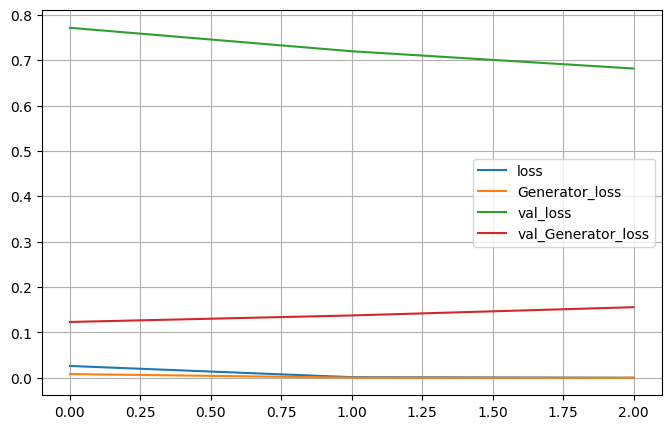

In [14]:
plotHistory(history)